## Problem Statement :-

* Business want to know what would be the tip amount based on features of sex, Invoice, day and time, so that they can negotiate with service man for salary and keep best employee at reasonable cost

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error


%matplotlib inline
%matplotlib notebook

In [2]:
# Import dataset
tips = pd.read_excel(r"C:\Users\javed.s\Desktop\Rough\tips.xlsx")

In [3]:
# Reading first few records
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# making a copy of orginal data
df = tips.copy()

#### Data Understanding

In [5]:
# checking how many records and columns we have (checking shape)
print('The Number of Records are        :',df.shape[0])
print('The Number of columns are        :',df.shape[1])

The Number of Records are        : 244
The Number of columns are        : 7


In [6]:
# checking columns name
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
# checking data types
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
# checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
# checking duplicate records
df.duplicated().sum()

1

In [10]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

In [11]:
# checking how many records and columns we have (checking shape)
print('The Number of Records are        :',df.shape[0])
print('The Number of columns are        :',df.shape[1])

The Number of Records are        : 243
The Number of columns are        : 7


In [12]:
# checking Missing value
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [13]:
# checking how many unique categories every features have
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [14]:
# checking categorical columns and numerical columns
cat_col = df.select_dtypes(include='object')
num_col = df.select_dtypes(exclude='object')

In [15]:
# defining custome function to check unique value
def cat_sub(df,col):
    result = df[col].unique() 
    return ('The sub categories  of features {}        : {}'.format(col , result))

In [16]:
for i in cat_col.columns:
    print(cat_sub(cat_col , i))

The sub categories  of features sex        : ['Female' 'Male']
The sub categories  of features smoker        : ['No' 'Yes']
The sub categories  of features day        : ['Sun' 'Sat' 'Thur' 'Fri']
The sub categories  of features time        : ['Dinner' 'Lunch']


#### EDA

In [17]:
sns.set(rc = {'axes.facecolor': 'white','axes.grid': False,'axes.labelsize': 'medium','axes.titlecolor': 'blue',
             'axes.titlesize': 'large',})

In [18]:
# defining function for Numerical columns un_variates analysis
def num_Uni_eda( df, col):
    print('The Feature Name is:  ',col)
    print(df[col].describe().round(2))
    print()
    print('Title of feature  :',col)
    
    fig , axes = plt.subplots(ncols=2, nrows=1, figsize = (12,6))
    sns.histplot(x = col ,data = df, ax = axes[0])
    sns.boxplot(y = col ,data = df, ax = axes[1])

    

The Feature Name is:   total_bill
count    243.00
mean      19.81
std        8.91
min        3.07
25%       13.38
50%       17.81
75%       24.17
max       50.81
Name: total_bill, dtype: float64

Title of feature  : total_bill


<IPython.core.display.Javascript object>


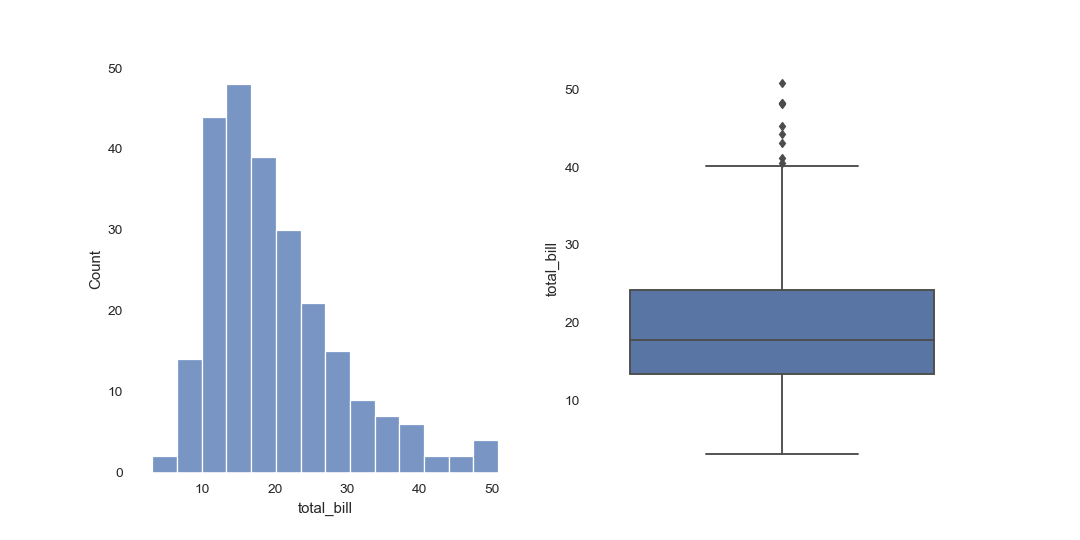

**************************************************
The Feature Name is:   tip
count    243.00
mean       3.00
std        1.39
min        1.00
25%        2.00
50%        2.92
75%        3.58
max       10.00
Name: tip, dtype: float64

Title of feature  : tip


<IPython.core.display.Javascript object>


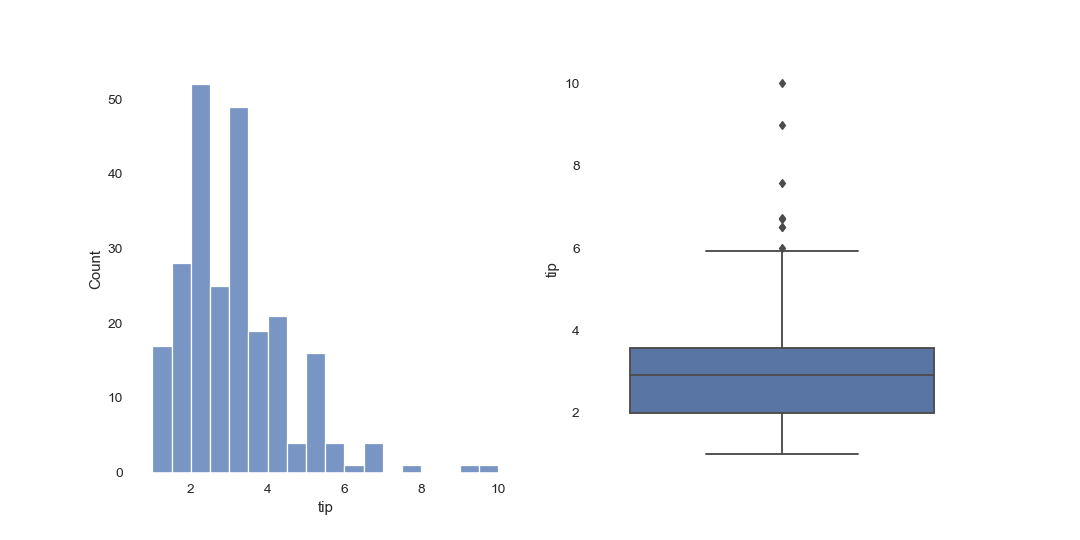

**************************************************
The Feature Name is:   size
count    243.00
mean       2.57
std        0.95
min        1.00
25%        2.00
50%        2.00
75%        3.00
max        6.00
Name: size, dtype: float64

Title of feature  : size


<IPython.core.display.Javascript object>


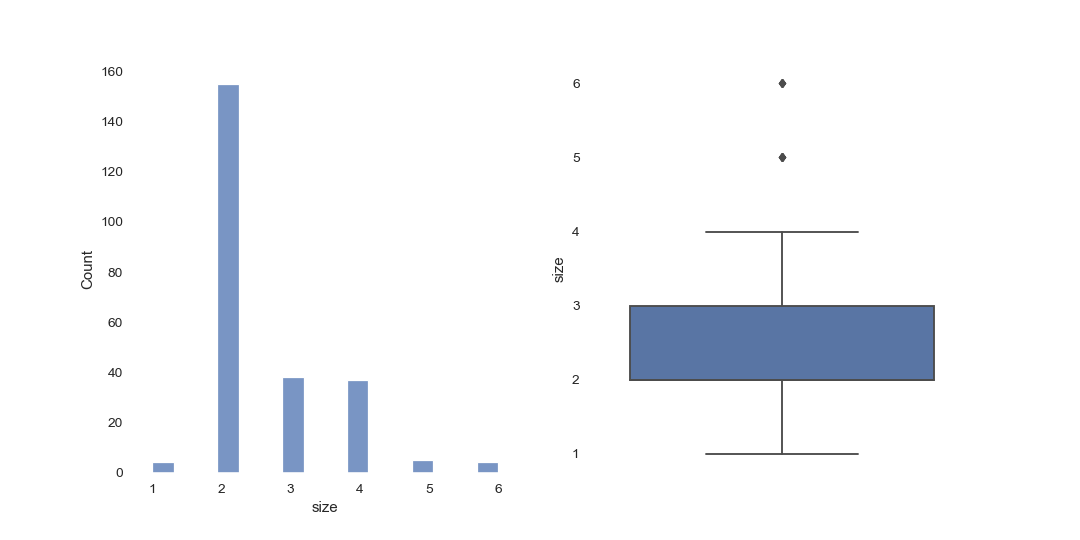

**************************************************


In [19]:
# Univariate EDA of Numerical columns
for i in num_col.columns:
    num_Uni_eda(num_col , i)
    print('*' * 50)
    

### **Observation**:

* distribution is not normal, its right skwed for "tip and Total Bill columns"

In [20]:
# defining function for categorical columns un_variates analysis
def cat_Uni_eda( df, col):
    print('The Feature Name is:  ',col)
    print(df[col].value_counts())
    print()
    print('-'*50)
    a = ((df[col].value_counts() / df[col].shape)*100).round(2) 
    print(a.astype(str) + '%')
    print()
    print('-'*50)
    print('Title of feature  :',col)
    plt.figure(figsize = (10,6))
    sns.countplot(x = col , data = df)

The Feature Name is:   sex
Male      157
Female     86
Name: sex, dtype: int64

--------------------------------------------------
Male      64.61%
Female    35.39%
Name: sex, dtype: object

--------------------------------------------------
Title of feature  : sex


<IPython.core.display.Javascript object>


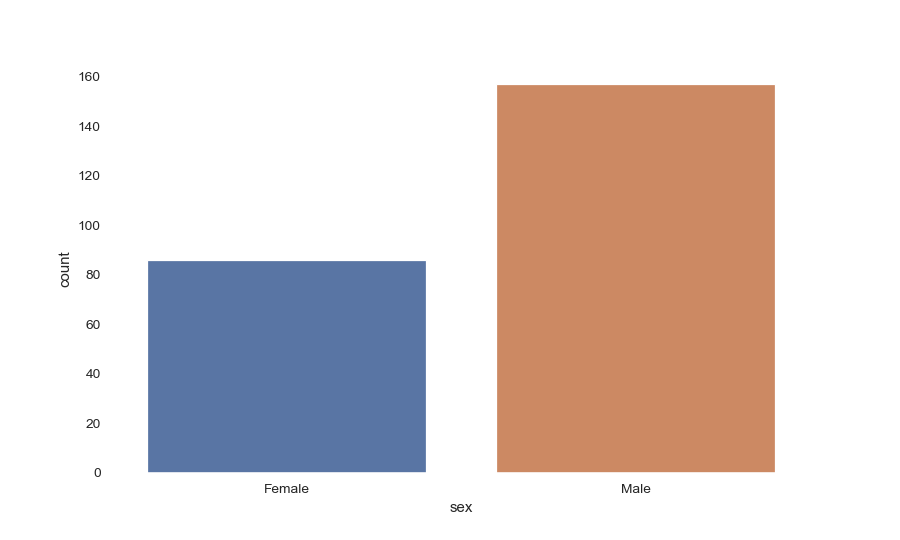

****************************************************************************************************
The Feature Name is:   smoker
No     151
Yes     92
Name: smoker, dtype: int64

--------------------------------------------------
No     62.14%
Yes    37.86%
Name: smoker, dtype: object

--------------------------------------------------
Title of feature  : smoker


<IPython.core.display.Javascript object>


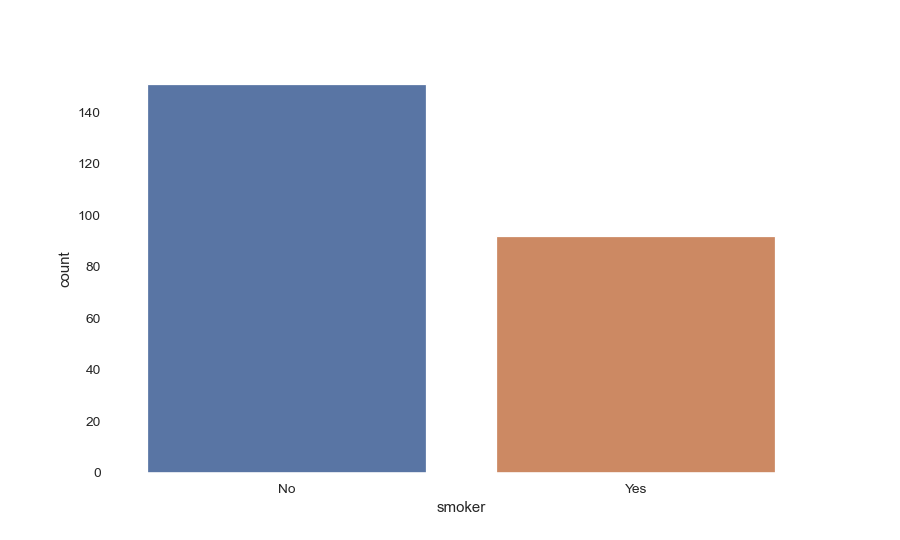

****************************************************************************************************
The Feature Name is:   day
Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64

--------------------------------------------------
Sat      35.8%
Sun     31.28%
Thur     25.1%
Fri      7.82%
Name: day, dtype: object

--------------------------------------------------
Title of feature  : day


<IPython.core.display.Javascript object>


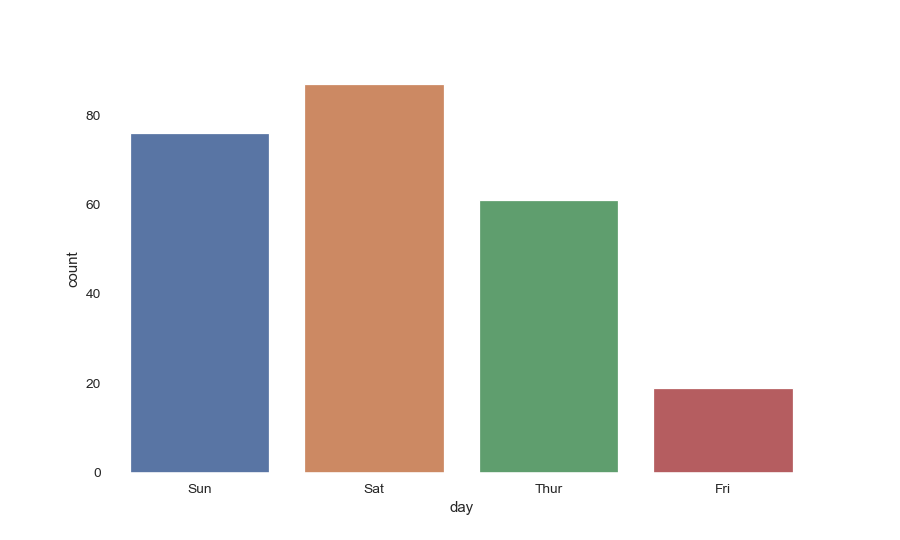

****************************************************************************************************
The Feature Name is:   time
Dinner    176
Lunch      67
Name: time, dtype: int64

--------------------------------------------------
Dinner    72.43%
Lunch     27.57%
Name: time, dtype: object

--------------------------------------------------
Title of feature  : time


<IPython.core.display.Javascript object>


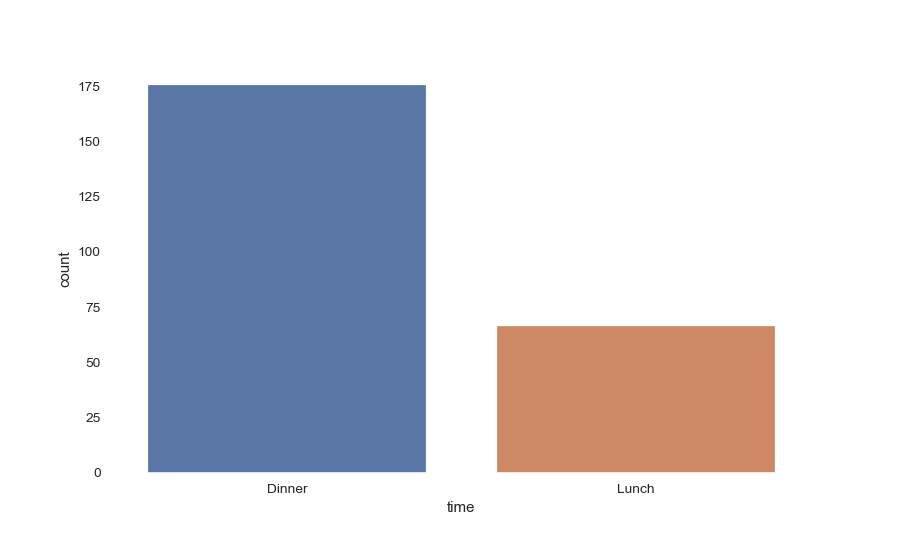

****************************************************************************************************


In [21]:
for i in cat_col.columns:
    cat_Uni_eda(cat_col, i)
    print('*' * 100)

### **Observation**:

* Males are more in numbers (65%) compare to female (35%)
* non smoker people are coming more in resturant to compare to smoker
* weekend accounted for 65% customer than to normal days
* More people preffered to come to resturant for dinner accounted for 72%


<IPython.core.display.Javascript object>


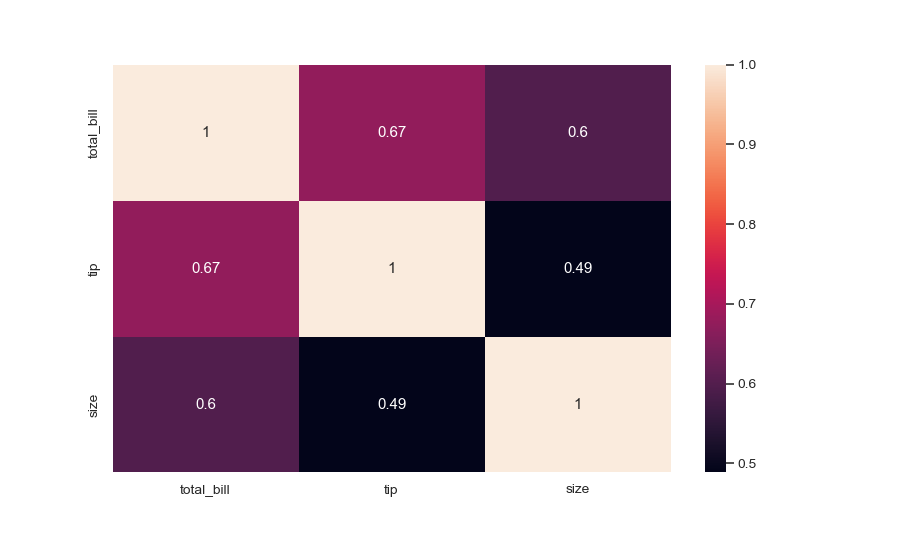

<AxesSubplot:>

In [22]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)

<IPython.core.display.Javascript object>


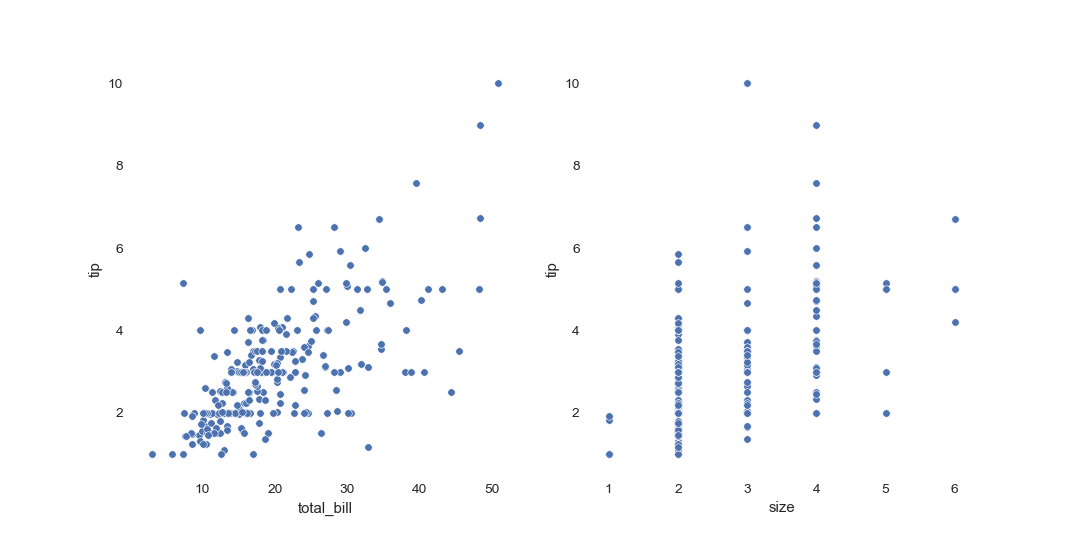

<AxesSubplot:xlabel='size', ylabel='tip'>

In [23]:
# Bi Variate EDA
# check does total bill value have any impact on tip
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.scatterplot(x = 'total_bill', y = 'tip' , data = df , ax = axes[0])
sns.scatterplot(x = 'size', y = 'tip' , data = df , ax = axes[1])

     sex   
tip  Female    2.84
     Male      3.09
     Total     3.00
dtype: float64


<IPython.core.display.Javascript object>


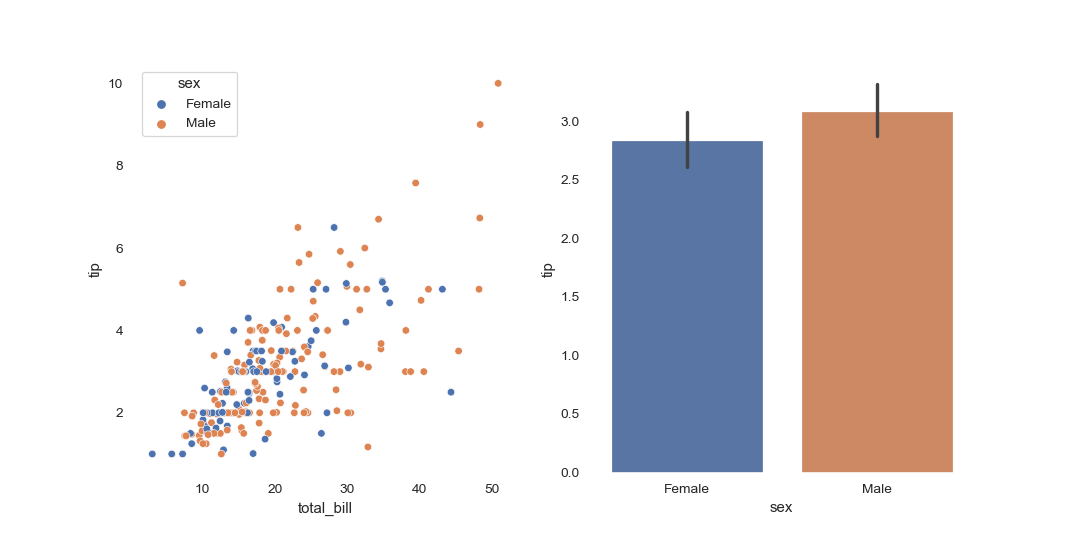

<AxesSubplot:xlabel='sex', ylabel='tip'>

In [24]:
sex_gp = pd.pivot_table(data = df,values='tip',index='sex',columns=None,aggfunc = 'mean',margins=True,margins_name='Total').unstack()

print(sex_gp.round(2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.scatterplot(x = 'total_bill', y = 'tip' ,hue = 'sex', data = df, ax = axes[0] )
sns.barplot(x = 'sex', y = 'tip', data = df , ax = axes[1])

     smoker
tip  No        2.99
     Yes       3.02
     Total     3.00
dtype: float64


<IPython.core.display.Javascript object>


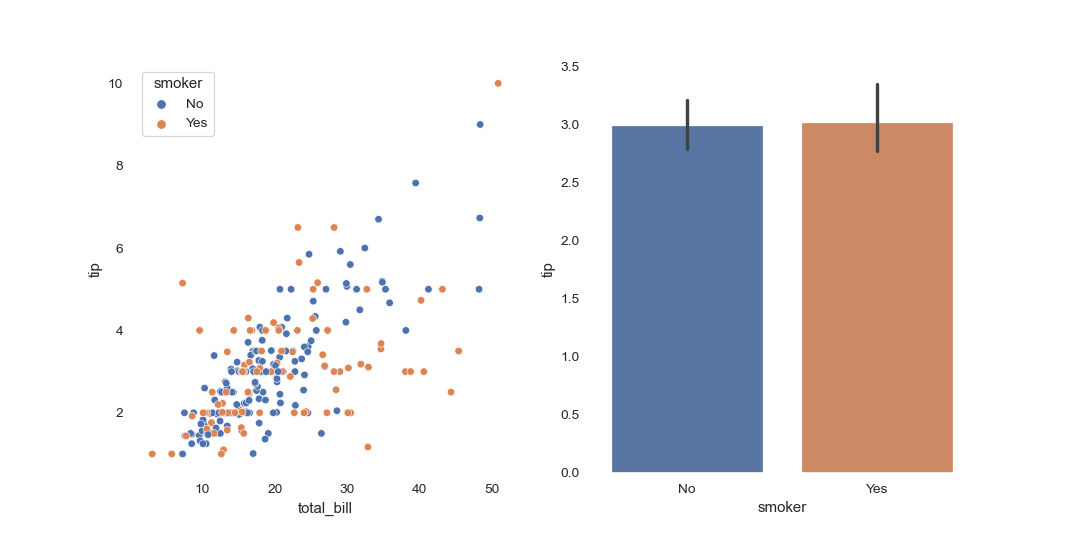

<AxesSubplot:xlabel='smoker', ylabel='tip'>

In [25]:
smoker_gp = pd.pivot_table(data = df,values='tip',index='smoker',columns=None,aggfunc = 'mean',margins=True,margins_name='Total').unstack([0])

print(smoker_gp.round(2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.scatterplot(x = 'total_bill', y = 'tip' ,hue = 'smoker', data = df, ax = axes[0] )
sns.barplot(x = 'smoker', y = 'tip', data = df , ax = axes[1])

     day  
tip  Fri      2.73
     Sat      2.99
     Sun      3.26
     Thur     2.78
     Total    3.00
dtype: float64


<IPython.core.display.Javascript object>


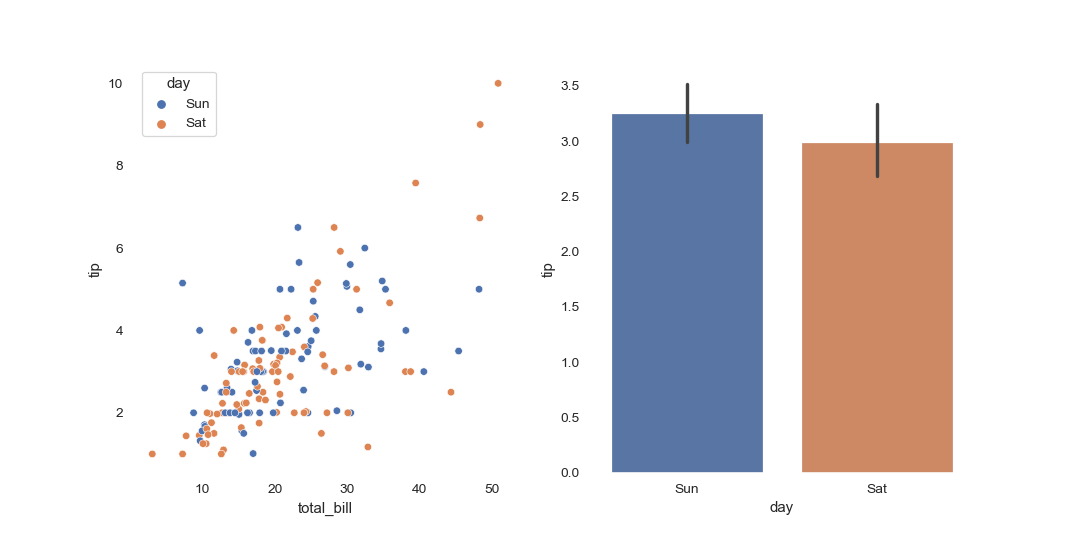

<AxesSubplot:xlabel='day', ylabel='tip'>

In [26]:
day_gp = pd.pivot_table(data = df,values='tip',index='day',columns=None,aggfunc = 'mean',margins=True,margins_name='Total').unstack([0])

print(day_gp.round(2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.scatterplot(x = 'total_bill', y = 'tip' ,hue = 'day', data = df [ (df['day'] == 'Sun') | (df['day'] == 'Sat') ][['day','total_bill', 'tip']], ax = axes[0] )
sns.barplot(x = 'day', y = 'tip', data = df [ (df['day'] == 'Sun') | (df['day'] == 'Sat') ][['day','total_bill', 'tip']] , ax = axes[1])

     time  
tip  Dinner    3.10
     Lunch     2.74
     Total     3.00
dtype: float64


<IPython.core.display.Javascript object>


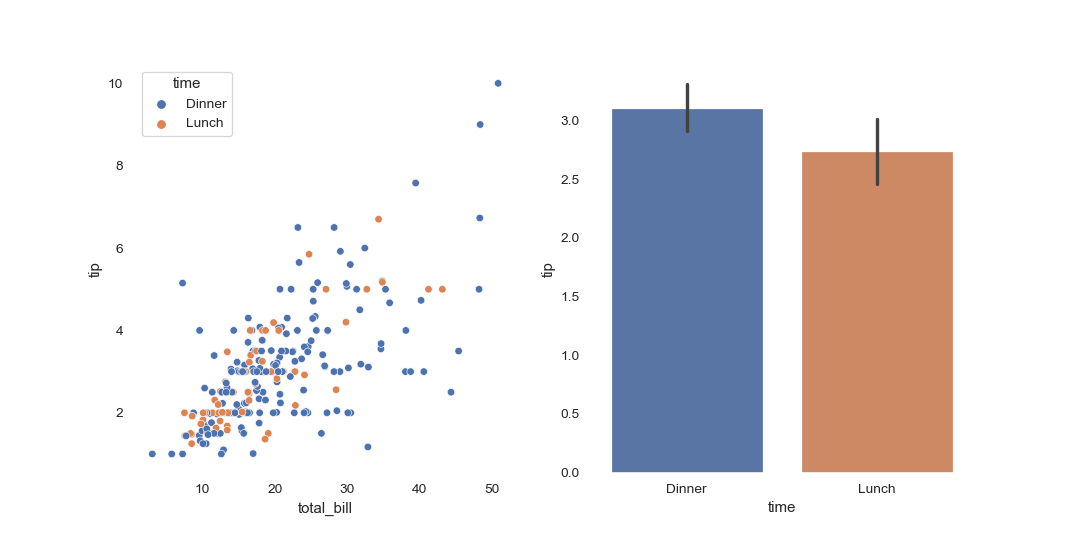

<AxesSubplot:xlabel='time', ylabel='tip'>

In [27]:
time_gp = pd.pivot_table(data = df,values='tip',index='time',columns=None,aggfunc = 'mean',margins=True,margins_name='Total').unstack([0])

print(time_gp.round(2))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.scatterplot(x = 'total_bill', y = 'tip' ,hue = 'time', data = df, ax = axes[0] )
sns.barplot(x = 'time', y = 'tip', data = df , ax = axes[1])

In [28]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')



#### Observation
* check is Male are giving more tips compare to female -- No
* check smoker give more tips or non somket  -- No
* check on weekend does waiter got more tips  -- Yes, avg tips are more on weekend, although more people come on saturday but avg tips are more on Sunday
* check in dinner tips are more received -- Yes




#### Conclusion from EDA:-

* tips are directly proportinate to total bill, higher the total bill , higher chance of Tip
*  Male customer are come more in number but this does not effect on tip
* similarly non smoker are more in number but does not have much difference on tip
* on weekend sat and sat more customer and compare to normal days and tips are also higher 
* more people preffer taking dinner and more tips received

-- Its recommended to keep better service man at weekend, better to keep female candidate as more men come this will increase total bill value and tips value

#### Data Preprocessing

In [29]:
# detecting Outlier
def outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    df[col] = np.where(df[col] > upper_limit, upper_limit , np.where(df[col] < lower_limit, lower_limit, df[col]))
    

In [30]:
# Removing outlier
outlier(df,'total_bill')
outlier(df,'tip')

<IPython.core.display.Javascript object>


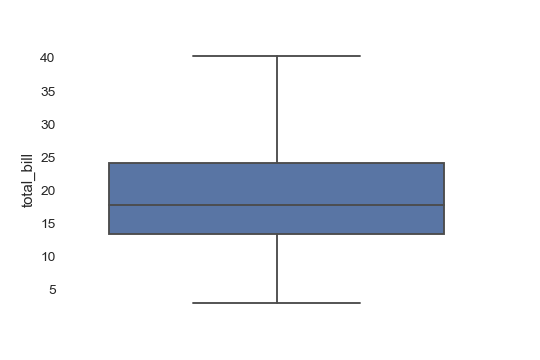

<AxesSubplot:ylabel='total_bill'>

In [31]:
# Checking
plt.figure()
sns.boxplot(y = 'total_bill', data = df)

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
# creating dummy variable for ML
new_df = pd.get_dummies(df, columns= ['sex','smoker','day','time'], drop_first=True)

In [34]:
new_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [35]:
# Split data into x , y
x = new_df.drop(columns=['tip']).values
y = new_df[['tip']].values

In [36]:
# split data into train and test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25, random_state=4)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(182, 8)
(182, 1)
(61, 8)
(61, 1)


In [38]:
# OLS
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [42]:
# making prediction
test_prediction = linear_reg.predict(x_test)
train_prediction = linear_reg.predict(x_train)

In [47]:
# checking score
print('The score of test data    : ' , r2_score(y_test, test_prediction))
print('The score of train data   : ' , r2_score(y_train, train_prediction))

# underfitted model

The score of test data    :  0.4985619442126019
The score of train data   :  0.41885506737417366


In [49]:
# checking Metrics
test_mse = mean_squared_error(y_test, test_prediction)
train_mse = mean_squared_error(y_train, train_prediction)

print('Test MSE :' , test_mse)
print('Train MSE :' , train_mse)

Test MSE : 0.9530785337458162
Train MSE : 0.7971833407405482


In [66]:
# Gradient decent
sgd = SGDRegressor(loss='squared_loss',alpha=0.0001)
sgd.fit(x_train,y_train)
test_prediction = linear_reg.predict(x_test)
train_prediction = linear_reg.predict(x_train)
print('The score of test data    : ' , r2_score(y_test, test_prediction))
print('The score of train data   : ' , r2_score(y_train, train_prediction))

test_mse = mean_squared_error(y_test, test_prediction)
train_mse = mean_squared_error(y_train, train_prediction)

print('Test MSE :' , test_mse)
print('Train MSE :' , train_mse)

The score of test data    :  0.4985619442126019
The score of train data   :  0.41885506737417366
Test MSE : 0.9530785337458162
Train MSE : 0.7971833407405482


C:\Users\javed.s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [70]:
# Hyper perameter tuning
sgd = SGDRegressor(loss='squared_loss',alpha=0.00001)
sgd.fit(x_train,y_train)
test_prediction = linear_reg.predict(x_test)
train_prediction = linear_reg.predict(x_train)
print('The score of test data    : ' , r2_score(y_test, test_prediction))
print('The score of train data   : ' , r2_score(y_train, train_prediction))

test_mse = mean_squared_error(y_test, test_prediction)
train_mse = mean_squared_error(y_train, train_prediction)

print('Test MSE :' , test_mse)
print('Train MSE :' , train_mse)

The score of test data    :  0.4985619442126019
The score of train data   :  0.41885506737417366
Test MSE : 0.9530785337458162
Train MSE : 0.7971833407405482


C:\Users\javed.s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# does not effecting much, so above model can be used to predict